<h3>Imports<h3>

In [9]:
import os
import sys
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import io, json
from pathlib import Path


<h3>Define EasyOCR function which takes Image_Path & returns a pdf file with bounding boxes<h3>

In [11]:
def get_EasyOCR_BB(img):
    #file_name = os.path.basename(IMAGE_PATH)
    reader = easyocr.Reader(['en'],gpu=False)
    # Options are available for Assamese, Bihari, Bhojpuri, Bengali, Farsi, Hindi, Kannada, Maithili, Marathi, Nepali, Paii, Nagpur, Urdu
    result = reader.readtext(img)
    text = result[0][1]
    i = 0
    plt.figure(figsize=(20,20))
    for (Dimensions,Word,Conf) in result:
        TopL = tuple(Dimensions[0])
        BottomR = tuple(Dimensions[2])
        TopL = (int(TopL[0]),int(TopL[1]))
        BottomR = (int(BottomR[0]),int(BottomR[1]))
        img = cv2.rectangle(img, TopL, BottomR, (255,0,0),2)
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.imshow(img)
    return plt
    #output_filename = file_name
    #plt.savefig(file_name+'_'+'bb'+'.pdf',bbox_inches='tight', pad_inches = 0)
    #output_image = 

<h3>Call EasyOCR_File Function<h3>

Using CPU. Note: This module is much faster with a GPU.


<Figure size 1440x1440 with 0 Axes>

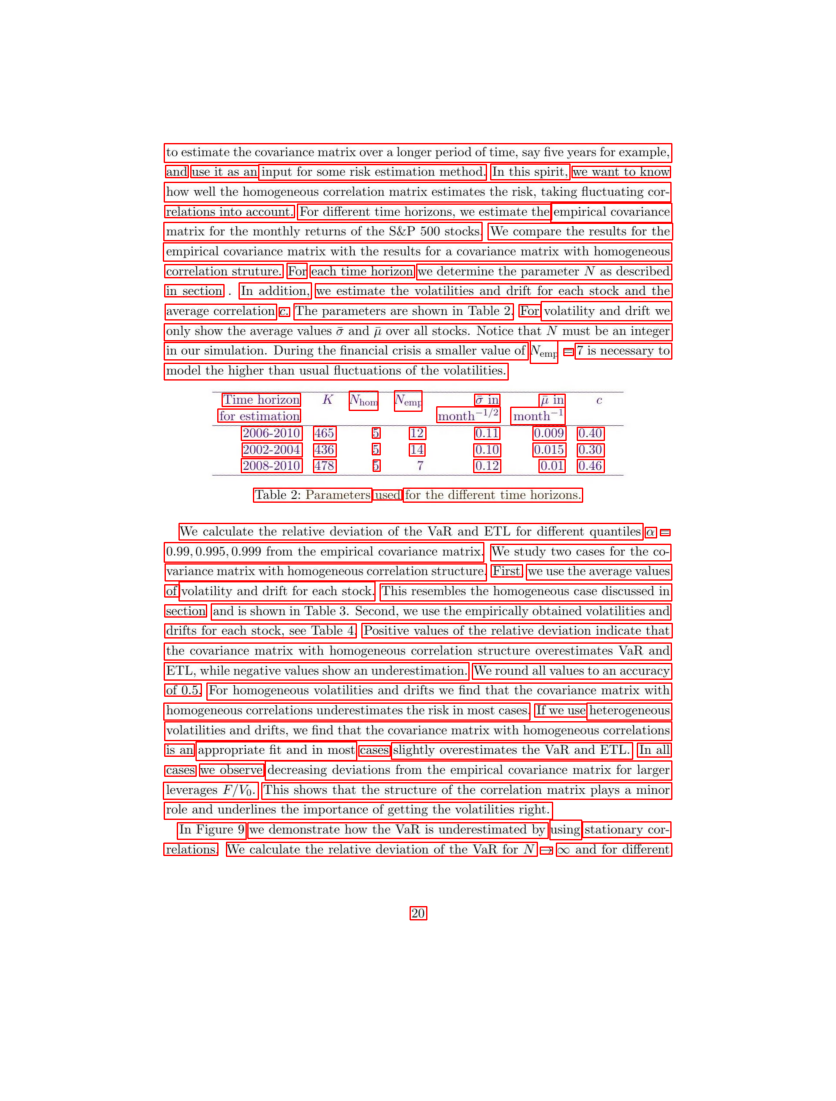

In [12]:
input_dir = ''
output_dir = ''
image_file = input_dir + 'SkewedImage.jpg'
image = cv2.imread(image_file)
output_image = get_EasyOCR_BB(Image)
#output_image.show()
output_image.save(Path(image_file).stem+'_corrected.jpg', 'JPEG')